# Data Analysis project
### Plotting the xG Difference rolling average of the top 6 Premier League teams since boxing day 2019 (26/12/2019)

Key Definitions
Expected Goals (xG): is a statistical metric used in soccer to assess the quality of a scoring opportunity. It quantifies the likelihood that a shot will result in a goal based on historical data and various factors, such as the location of the shot, the angle, and other relevant variables.

For example, if a shot has an xG value of 0.3, it indicates a 30% probability of that shot ending in a goal, given similar past situations.

In the context of a team's performance, the xG value is calculated by summing up the xG values of all the shots taken during a game. It represents the total expected goals a team could have scored in that particular match. Conversely, Expected Goals Against (xGA) is the cumulative xG value of all the shots conceded by a team, reflecting the expected goals their opponents could have scored.

xG and xGA are valuable tools for analyzing a team's offensive and defensive capabilities, as they offer a quantitative assessment of scoring opportunities and defensive strength.

Example: In a match between Team A and Team B, the xG scores were as follows:
        Team A xG: 1.6
        Team B xG: 2.2
        (This makes team A's xGA to be 2.2 and Team B's xGA to be 1.6)

These xG scores represent the expected goal values for each team during the game. Team A accumulated an xG of 1.6, indicating the quality of scoring opportunities they created, while Team B had an xG of 2.2, indicating the quality of chances they generated.

Importantly, the xG values provide statistical insights into the match. Team B's higher xG score suggests that they created better goal-scoring opportunities than Team A. If this game were to be replayed numerous times (e.g., 10,000 times), Team B would likely emerge as the victor in the majority of those matches. xG analysis helps quantify a team's performance and scoring potential in a given game.

xGD or Expected Goal Difference is a metric that calculates the difference between a team's xG and XGA.
A positive xGD indicates a team is expected to score more goals than they are likely to concede. Conversely a negative xGD indicates the reverse.
If a team has a positive xGD over a period of time usually means the the team is doing well and vice versa.


Description
This Python script analyzes and visualizes the Expected Goal (xG) difference for the top 6 teams
in the English Premier League (EPL) over a specified period of time. It calculates the xG difference by 
subtracting expected goals against (xGA) from expected goals for (xGF) for each team.
xG Difference = xG - xGA
The code utilizes data from fbref and provides insights into the overall performance trends of these teams.

Sections:
1. Data Acquisition: Data is collected from fbref containing xG and xGA data.
2. Data Cleaning and Preparation: Data is cleaned and trimmed down for our required timeframe.
3. Data Analysis: The xG difference is calculated for each top 6 team, providing insights into their
   attacking and defensive strengths.
4. Data Visualization: The results are visualized using line plots to show trends in xG difference
   over time.
5. Conclusion and Insights: A summary of key findings and insights from the analysis.




In [1]:
# Importing all the required libraries for this project

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Setting max rows to 200, so we can look into our data
# Also setting some constant to be utlised later

pd.set_option('display.max_rows', 200)

#### Data for this project was be directly scraped from fbref website using pandas read_html function
#### The links required for this project were manually input wherever needed


##### Might get an error if the website structure changes

In [9]:
# Sampling our read_function and the url obtained via fbref

url_df = 'https://fbref.com/en/squads/18bb7c10/2019-2020/c9/Arsenal-Stats-Premier-League#all_stats_standard'

arsenal_1 = pd.read_html(url_df)[1]
arsenal_1 = arsenal_1.reset_index(drop=True)
arsenal_1

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2019-08-11,14:00,Matchweek 1,Sun,Away,W,1,0,Newcastle Utd,1.1,0.4,62,47635.0,Granit Xhaka,4-2-3-1,Martin Atkinson,Match Report,NaN
1,2019-08-17,12:30,Matchweek 2,Sat,Home,W,2,1,Burnley,0.8,1.5,67,60214.0,Nacho Monreal,4-2-3-1,Mike Dean,Match Report,NaN
2,2019-08-24,17:30,Matchweek 3,Sat,Away,L,1,3,Liverpool,1.0,2.5,48,53298.0,Granit Xhaka,4-3-1-2,Anthony Taylor,Match Report,NaN
3,2019-09-01,16:30,Matchweek 4,Sun,Home,D,2,2,Tottenham,2.4,2.0,55,60333.0,Granit Xhaka,4-3-3,Martin Atkinson,Match Report,NaN
4,2019-09-15,16:30,Matchweek 5,Sun,Away,D,2,2,Watford,0.8,2.7,48,21360.0,Granit Xhaka,4-1-2-1-2◆,Anthony Taylor,Match Report,NaN
5,2019-09-22,16:30,Matchweek 6,Sun,Home,W,3,2,Aston Villa,2.4,1.5,58,60331.0,Granit Xhaka,4-2-3-1,Jonathan Moss,Match Report,NaN
6,2019-09-30,20:00,Matchweek 7,Mon,Away,D,1,1,Manchester Utd,1.9,0.9,45,73201.0,Granit Xhaka,4-3-3,Kevin Friend,Match Report,NaN
7,2019-10-06,14:00,Matchweek 8,Sun,Home,W,1,0,Bournemouth,1.2,0.6,53,60326.0,Granit Xhaka,4-2-3-1,Martin Atkinson,Match Report,NaN
8,2019-10-21,20:00,Matchweek 9,Mon,Away,L,0,1,Sheffield Utd,1.0,0.9,67,30775.0,Granit Xhaka,4-2-3-1,Mike Dean,Match Report,NaN
9,2019-10-27,16:30,Matchweek 10,Sun,Home,D,2,2,Crystal Palace,1.3,1.6,56,60345.0,Granit Xhaka,4-4-2,Martin Atkinson,Match Report,NaN


In [11]:
# Now we are going to have to run a similar type of code to get data from seasons 20-21, 21-22, 22-23
# and 23-24

# After getting all the data we will have to concatenate all the dfs into a single df for every team. This 
# will give us 6 different df. 1 for every team in the top 6.

# After concatenating the df, we will calculate the xG Difference from the xG and xGA values we already
# have in the dataset

# From the xG difference values, we will create a new column for the rolling average of xGd using the 
# .rolling() function. Since we want to look at a relatively big timeframe, we will set the window_size to 
# be 15.

# In the next code block, we will create a function that does all of the above mentioned tasks in one go

In [3]:
def main_func(urls, Y=4):
    """
    This function takes in a list of urls. In our case 5 urls for the respective PL seasons - 
    19/20, 20/21, 21/22, 22/23, 23/24.
    Uses pd.read_html to scrape the data for all the seasons and puts them in a list [dfs] where the 
    datatype of each of the item is a pandas dataframe.
    After that the function trims the data so we have data starting from the beginning of season 2019/20
    to gameweek 4 of season 2023/24.
    Next step, it concatenates all the dfs for the particular team into 1 df.
    After that, it calculates the xG Difference and trims down the df further, removing all the unnecessary
    columns.
    Second to last step is calculating the Simple Moving Average or the rolling average.
    Finally we take out the first 20 values from the df because it comes out very choppy in the data
    visualisations which come next.
    
    """
    dfs = []

    for url in urls:
        df = pd.read_html(url)[1]
        
        if len(dfs) == len(urls) - 1:
            df = df.iloc[:Y]

        df = df.reset_index(drop=True)
        dfs.append(df)

    # Concatenate all DataFrames vertically
    concatenated_df = pd.concat(dfs, axis=0)

    # Reset the index of the concatenated DataFrame
    concatenated_df = concatenated_df.reset_index(drop=True)
    
    # Calculate the xG Difference
    concatenated_df['xGd'] = concatenated_df['xG'] - concatenated_df['xGA']
    
    # Trim down the data to remove unnecessary columns
    df = concatenated_df[['Date', 'xG', 'xGA', 'xGd']]
    
    window_size = 21

    # Calculate the rolling average for the entire column
    df['SMA'] = df['xGd'].rolling(window=window_size, min_periods=1).mean()
    
    # Taking out the first 20 values
    df = df.iloc[20:]

    return df


In [4]:
# Creating the url lists for all the teams

arsenal_urls = ['https://fbref.com/en/squads/18bb7c10/2019-2020/c9/Arsenal-Stats-Premier-League#all_stats_standard',
          'https://fbref.com/en/squads/18bb7c10/2020-2021/c9/Arsenal-Stats-Premier-League#all_stats_standard',
          'https://fbref.com/en/squads/18bb7c10/2021-2022/c9/Arsenal-Stats-Premier-League#all_stats_standard',
          'https://fbref.com/en/squads/18bb7c10/2022-2023/c9/Arsenal-Stats-Premier-League#all_stats_standard',
          'https://fbref.com/en/squads/18bb7c10/2023-2024/c9/Arsenal-Stats-Premier-League#all_stats_standard']

city_urls = ['https://fbref.com/en/squads/b8fd03ef/2019-2020/c9/Manchester-City-Stats-Premier-League#all_stats_standard',
          'https://fbref.com/en/squads/b8fd03ef/2020-2021/c9/Manchester-City-Stats-Premier-League#all_stats_standard',
          'https://fbref.com/en/squads/b8fd03ef/2021-2022/c9/Manchester-City-Stats-Premier-League#all_stats_standard',
          'https://fbref.com/en/squads/b8fd03ef/2022-2023/c9/Manchester-City-Stats-Premier-League#all_stats_standard',
          'https://fbref.com/en/squads/b8fd03ef/2023-2024/c9/Manchester-City-Stats-Premier-League#all_stats_standard']

united_urls = ['https://fbref.com/en/squads/19538871/2019-2020/c9/Manchester-United-Stats-Premier-League#all_stats_standard',
            'https://fbref.com/en/squads/19538871/2020-2021/c9/Manchester-United-Stats-Premier-League#all_stats_standard',
            'https://fbref.com/en/squads/19538871/2021-2022/c9/Manchester-United-Stats-Premier-League#all_stats_standard',
            'https://fbref.com/en/squads/19538871/2022-2023/c9/Manchester-United-Stats-Premier-League#all_stats_standard',
            'https://fbref.com/en/squads/19538871/2023-2024/c9/Manchester-United-Stats-Premier-League#all_stats_standard']

spurs_urls = ['https://fbref.com/en/squads/361ca564/2019-2020/c9/Tottenham-Hotspur-Stats-Premier-League#all_stats_standard',
            'https://fbref.com/en/squads/361ca564/2020-2021/c9/Tottenham-Hotspur-Stats-Premier-League#all_stats_standard',
            'https://fbref.com/en/squads/361ca564/2021-2022/c9/Tottenham-Hotspur-Stats-Premier-League#all_stats_standard',
            'https://fbref.com/en/squads/361ca564/2022-2023/c9/Tottenham-Hotspur-Stats-Premier-League#all_stats_standard',
            'https://fbref.com/en/squads/361ca564/2023-2024/c9/Tottenham-Hotspur-Stats-Premier-League#all_stats_standard']

liverpool_urls = ['https://fbref.com/en/squads/822bd0ba/2019-2020/c9/Liverpool-Stats-Premier-League#all_stats_standard',
                'https://fbref.com/en/squads/822bd0ba/2020-2021/c9/Liverpool-Stats-Premier-League#all_stats_standard',
                'https://fbref.com/en/squads/822bd0ba/2021-2022/c9/Liverpool-Stats-Premier-League#all_stats_standard',
                'https://fbref.com/en/squads/822bd0ba/2022-2023/c9/Liverpool-Stats-Premier-League#all_stats_standard',
                'https://fbref.com/en/squads/822bd0ba/2023-2024/c9/Liverpool-Stats-Premier-League#all_stats_standard']

chelsea_urls = ['https://fbref.com/en/squads/cff3d9bb/2019-2020/c9/Chelsea-Stats-Premier-League#all_stats_standard',
                'https://fbref.com/en/squads/cff3d9bb/2020-2021/c9/Chelsea-Stats-Premier-League#all_stats_standard',
                'https://fbref.com/en/squads/cff3d9bb/2021-2022/c9/Chelsea-Stats-Premier-League#all_stats_standard',
                'https://fbref.com/en/squads/cff3d9bb/2022-2023/c9/Chelsea-Stats-Premier-League#all_stats_standard',
                'https://fbref.com/en/squads/cff3d9bb/2023-2024/c9/Chelsea-Stats-Premier-League#all_stats_standard']

C:\Users\wasiw\AppData\Local\Temp\ipykernel_25792\3542875522.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA'] = df['xGd'].rolling(window=window_size, min_periods=1).mean()


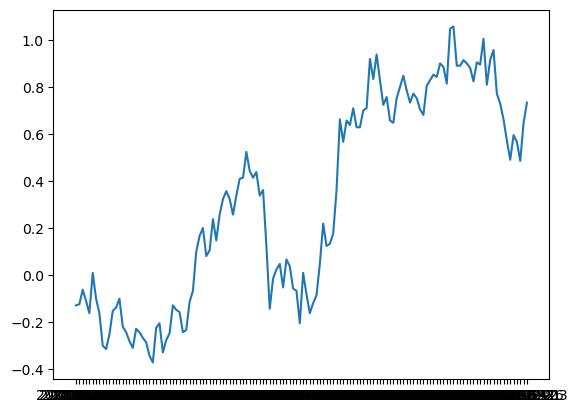

In [5]:
# Sampling one of the dfs and plotting it using matplotlib to confirm the main_func function works

arsenal = main_func(arsenal_urls)
plt.plot(arsenal.Date, arsenal.SMA)

## We can confirm the main_func() funciton works fine

### We will now create our final dfs for all our teams using main_func()

In [6]:
city = main_func(city_urls)
liverpool = main_func(liverpool_urls)
united = main_func(united_urls)
spurs = main_func(spurs_urls)
chelsea = main_func(chelsea_urls)

C:\Users\wasiw\AppData\Local\Temp\ipykernel_25792\3542875522.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA'] = df['xGd'].rolling(window=window_size, min_periods=1).mean()
C:\Users\wasiw\AppData\Local\Temp\ipykernel_25792\3542875522.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA'] = df['xGd'].rolling(window=window_size, min_periods=1).mean()
C:\Users\wasiw\AppData\Local\Temp\ipykernel_25792\3542875522.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [7]:
# Since we need to plot all of these on the same plot, we will create a new column in all these dfs called
# matches which will have the same value. This will be used as the x-axis in our plots.

dfs = [arsenal, city, liverpool, united, spurs, chelsea]
for df in dfs:
    df['matches'] = range(1, len(df) + 1)

## Now we will use matplotlib to draw out our final plot
#### The xG difference rolling average of the top 6 teams in the PL

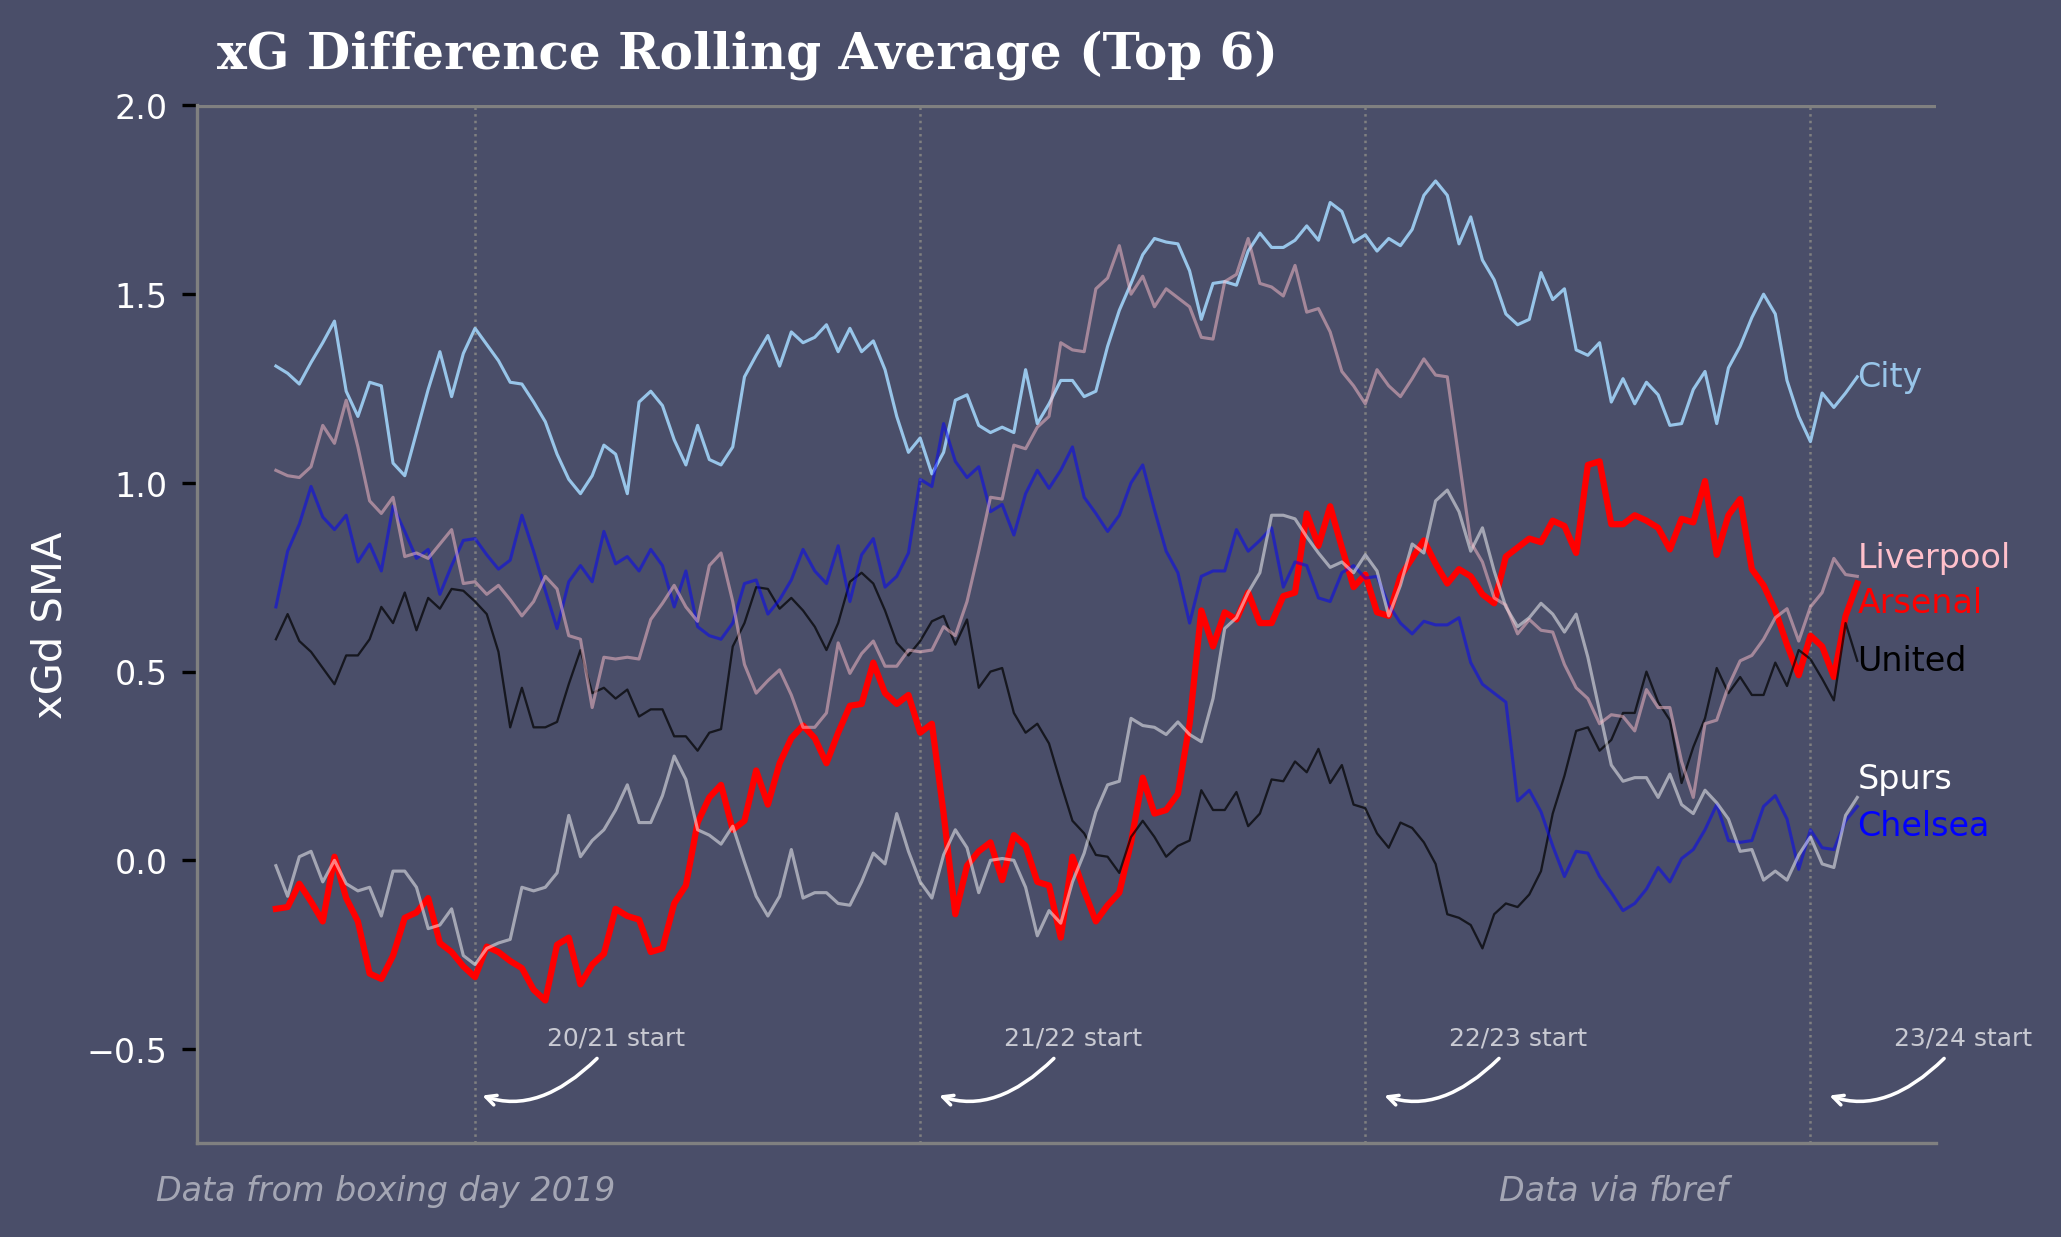

In [14]:
fig = plt.figure(figsize=(7, 4), dpi = 300)
ax = plt.subplot(111)
ax.patch.set_color('#4a4e69')
fig.set_facecolor('#4a4e69')

ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")



arsenal_ = ax.plot(arsenal.matches,arsenal.SMA, zorder=4, label= 'Arsenal', lw=1.5, color='red')
city_ = ax.plot(city.matches,city.SMA, lw = 0.75, zorder = 4,label='City', color = '#98C5E9')
united_ = ax.plot(united.matches,united.SMA, lw = 0.55, zorder = 4, label='United', color = 'black', alpha=0.7)
chelsea_ = ax.plot(chelsea.matches,chelsea.SMA, lw = 0.75, zorder = 4, label='Chelsea', color = 'blue', alpha=0.5)
spurs_ = ax.plot(spurs.matches,spurs.SMA, lw = 0.75, zorder = 4, label='Spurs', color='white', alpha=0.5)
liverpool_ = ax.plot(liverpool.matches,liverpool.SMA, lw = 0.75, zorder = 4, label='Liverpool', color = 'pink', alpha=0.5)

plt.ylabel('xGd SMA', fontsize=10, color = 'w')
plt.yticks(fontsize = 8, color ='w')
ax.set_ylim(-0.75,2)


ax.set_xticklabels([])
ax.tick_params(axis='x', which='both', bottom=False)


# Add a line to mark 20/21 begin
ax.plot(
    [18,18], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 0.6,
    color = "grey",
    zorder = 2
)

# Add a line to mark 21/22 begin
ax.plot(
    [56,56], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 0.6,
    color = "grey",
    zorder = 2
)

# Add a line to mark 22/23 begin
ax.plot(
    [94,94], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 0.6,
    color = "grey",
    zorder = 2
)

# Add a line to mark 23/24 begin
ax.plot(
    [132,132], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 0.6,
    color = "grey",
    zorder = 2
)

ax.text(
    -4,  # X-coordinate of the text
    2.1,  # Y-coordinate of the text (adjust as needed)
    "xG Difference Rolling Average (Top 6)",  # Text label
    fontsize=12,
    color="white",
    weight='bold',
    fontfamily='serif',
    horizontalalignment='left'
)



plt.axhline(y = 2, color = 'grey', linestyle = '-')

ax.annotate(
    xy = (17, -0.6),
    xytext = (20, 10),
    textcoords = "offset points",
    text = "20/21 start",
    size = 6,
    color = "white",
    alpha=0.7,
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="w", linewidth=0.85,
        connectionstyle="angle3,angleA=50,angleB=-30"
   )#  Arrow to connect annotation
)

ax.annotate(
    xy = (56, -0.6),
    xytext = (20, 10),
    textcoords = "offset points",
    text = "21/22 start",
    size = 6,
    color = "white",
    alpha=0.7,
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="w", linewidth=0.85,
        connectionstyle="angle3,angleA=50,angleB=-30"
   )#  Arrow to connect annotation
)

ax.annotate(
    xy = (94, -0.6),
    xytext = (20, 10),
    textcoords = "offset points",
    text = "22/23 start",
    size = 6,
    color = "white",
    alpha=0.7,
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="w", linewidth=0.85,
        connectionstyle="angle3,angleA=50,angleB=-30"
   )#  Arrow to connect annotation
)

ax.annotate(
    xy = (132, -0.6),
    xytext = (20, 10),
    textcoords = "offset points",
    text = "23/24 start",
    size = 6,
    color = "white",
    alpha=0.7,
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="w", linewidth=0.85,
        connectionstyle="angle3,angleA=50,angleB=-30"
   )#  Arrow to connect annotation
)

# Add label for Arsenal
x_end_arsenal = arsenal.matches.iloc[-1]
y_end_arsenal = arsenal.SMA.iloc[-1] -0.05
ax.text(x_end_arsenal, y_end_arsenal, 'Arsenal', fontsize=8, color='red', va='center')

# Add label for City
x_end_city = city.matches.iloc[-1]
y_end_city = city.SMA.iloc[-1]
ax.text(x_end_city, y_end_city, 'City', fontsize=8, color='#98C5E9', va='center')

# Add label for United
x_end_united = united.matches.iloc[-1]
y_end_united = united.SMA.iloc[-1]
ax.text(x_end_united, y_end_united, 'United', fontsize=8, color='black', va='center')

# Add label for Chelsea
x_end_chelsea = chelsea.matches.iloc[-1]
y_end_chelsea = chelsea.SMA.iloc[-1]-0.05
ax.text(x_end_chelsea, y_end_chelsea, 'Chelsea', fontsize=8, color='blue', va='center')

# Add label for Spurs
x_end_spurs = spurs.matches.iloc[-1]
y_end_spurs = spurs.SMA.iloc[-1]+0.05
ax.text(x_end_spurs, y_end_spurs, 'Spurs', fontsize=8, color='white', va='center')

# Add label for Liverpool
x_end_liverpool = liverpool.matches.iloc[-1]
y_end_liverpool = liverpool.SMA.iloc[-1] + 0.05
ax.text(x_end_liverpool, y_end_liverpool, 'Liverpool', fontsize=8, color='pink', va='center')

plt.tight_layout()

# Data Credit

ax.text(
    125,  # X-coordinate of the text (adjust as needed)
    -0.9,  # Y-coordinate of the text (adjust as needed)
    "Data via fbref",  # Text label
    fontsize=8,
    color="white",
    alpha=0.5,
    style='italic',  # Set to 'italic' for italics
    horizontalalignment='right'
)
ax.text(
        30,  # X-coordinate of the text (adjust as needed)
        -0.9,  # Y-coordinate of the text (adjust as needed)
        "Data from boxing day 2019",  # Text label
        fontsize=8,
        color="white",
        alpha=0.5,
        style='italic',  # Set to 'italic' for italics
        horizontalalignment='right'
    )

plt.show()

## Conclusion
1) The data shows that Manchester City (light blue) have been the best performing team in the English Premier League since the start of season 19/20. This has been reflected in the real world as well with them winning the PL in 4 times in the last 5 seasons. There's also a large gap between them and the next best team.
2) Arsenal (red) have shown the biggest improvement in performance during this timeframe. Starting out as the worst team in our sample, Arsenal have climbed to being a hair's distance away from Liverpool (pink).
3) Liverpool are the only team to have statistically challenged City's dominance. This came in the 21/22 season. But since then, they have fallen off a cliff.
5) Chelsea (dark blue) have been the worst performing side in our sample. Starting out as the 2nd best team in the dataset, they have gradually fallen to being the worst.
4) The other 2 teams (Manchester United and Spurs) have had their ups and downs but no clear trend can be identified.

### To add a final touch, we will create a function that will throw out whatever plots we want depending on the input we give it

In [18]:
def plot_team_comparison(team_data_list, title, team_names):
    """
    Inputs to this function will be a list of the df of teams we want to compare, the title of the plot,
    and the name of the teams
    """
    # Defining a dictionary to map team names to fixed colors
    team_colors = {
        "Arsenal": 'red',
        "City": '#98C5E9',
        "United": 'black',
        "Chelsea": 'blue',
        "Spurs": 'white',
        "Liverpool": 'pink'
        # Can Add more teams and colors as needed
    }

    fig = plt.figure(figsize=(7, 4), dpi=300)
    ax = plt.subplot(111)
    ax.patch.set_color('#4a4e69')
    fig.set_facecolor('#4a4e69')

    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["left", "bottom"]].set_color("grey")

    for i, team_data in enumerate(team_data_list):
        # Plotting the specified team's data using the fixed color
        team_name = team_names[i]
        color = team_colors.get(team_name, 'red')  # Default to 'red' if not found
        ax.plot(team_data.matches, team_data.SMA, zorder=4, label=team_name, lw=1.5, color=color)

    plt.ylabel('xGd SMA', fontsize=10, color='w')
    plt.yticks(fontsize=8, color='w')
    ax.set_ylim(-0.75, 2)

    ax.set_xticklabels([])
    ax.tick_params(axis='x', which='both', bottom=False)
    
    # Add a line to mark 20/21 begin
    ax.plot(
        [18,18], # 38 games per season
        [ax.get_ylim()[0], ax.get_ylim()[1]],
        ls = ":",
        lw = 0.6,
        color = "grey",
        zorder = 2
    )

    # Add a line to mark 21/22 begin
    ax.plot(
        [56,56], # 38 games per season
        [ax.get_ylim()[0], ax.get_ylim()[1]],
        ls = ":",
        lw = 0.6,
        color = "grey",
        zorder = 2
    )

    # Add a line to mark 22/23 begin
    ax.plot(
        [94,94], # 38 games per season
        [ax.get_ylim()[0], ax.get_ylim()[1]],
        ls = ":",
        lw = 0.6,
        color = "grey",
        zorder = 2
    )

    # Add a line to mark 23/24 begin
    ax.plot(
        [132,132], # 38 games per season
        [ax.get_ylim()[0], ax.get_ylim()[1]],
        ls = ":",
        lw = 0.6,
        color = "grey",
        zorder = 2
    )

    ax.text(
        -4,  # X-coordinate of the text
        2.1,  # Y-coordinate of the text (adjust as needed)
        "xG Difference Rolling Average (Top 6)",  # Text label
        fontsize=12,
        color="white",
        weight='bold',
        fontfamily='serif',
        horizontalalignment='left'
    )



    plt.axhline(y = 2, color = 'grey', linestyle = '-')

    ax.annotate(
        xy = (17, -0.6),
        xytext = (20, 10),
        textcoords = "offset points",
        text = "20/21 start",
        size = 6,
        color = "white",
        alpha=0.7,
        arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color="w", linewidth=0.85,
            connectionstyle="angle3,angleA=50,angleB=-30"
       )#  Arrow to connect annotation
    )

    ax.annotate(
        xy = (56, -0.6),
        xytext = (20, 10),
        textcoords = "offset points",
        text = "21/22 start",
        size = 6,
        color = "white",
        alpha=0.7,
        arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color="w", linewidth=0.85,
            connectionstyle="angle3,angleA=50,angleB=-30"
       )#  Arrow to connect annotation
    )

    ax.annotate(
        xy = (94, -0.6),
        xytext = (20, 10),
        textcoords = "offset points",
        text = "22/23 start",
        size = 6,
        color = "white",
        alpha=0.7,
        arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color="w", linewidth=0.85,
            connectionstyle="angle3,angleA=50,angleB=-30"
       )#  Arrow to connect annotation
    )

    ax.annotate(
        xy = (132, -0.6),
        xytext = (20, 10),
        textcoords = "offset points",
        text = "23/24 start",
        size = 6,
        color = "white",
        alpha=0.7,
        arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color="w", linewidth=0.85,
            connectionstyle="angle3,angleA=50,angleB=-30"
       )#  Arrow to connect annotation
    )
    

    # Adding label position based on team_data
    for i, team_data in enumerate(team_data_list):
        x_end_team = team_data.matches.iloc[-1]
        y_end_team = team_data.SMA.iloc[-1] - 0.05
        team_name = team_names[i]
        color = team_colors.get(team_name, 'red')
        ax.text(x_end_team, y_end_team, team_names[i], fontsize=8, color=color, va='center')

    # Data credit
    ax.text(
        125,  # X-coordinate of the text (adjust as needed)
        -0.9,  # Y-coordinate of the text (adjust as needed)
        "Data via fbref",  # Text label
        fontsize=8,
        color="white",
        alpha=0.5,
        style='italic',  # Set to 'italic' for italics
        horizontalalignment='right'
    )
    ax.text(
        30,  # X-coordinate of the text (adjust as needed)
        -0.9,  # Y-coordinate of the text (adjust as needed)
        "Data from boxing day 2019",  # Text label
        fontsize=8,
        color="white",
        alpha=0.5,
        style='italic',  # Set to 'italic' for italics
        horizontalalignment='right'
    )

    plt.tight_layout()
    plt.show()


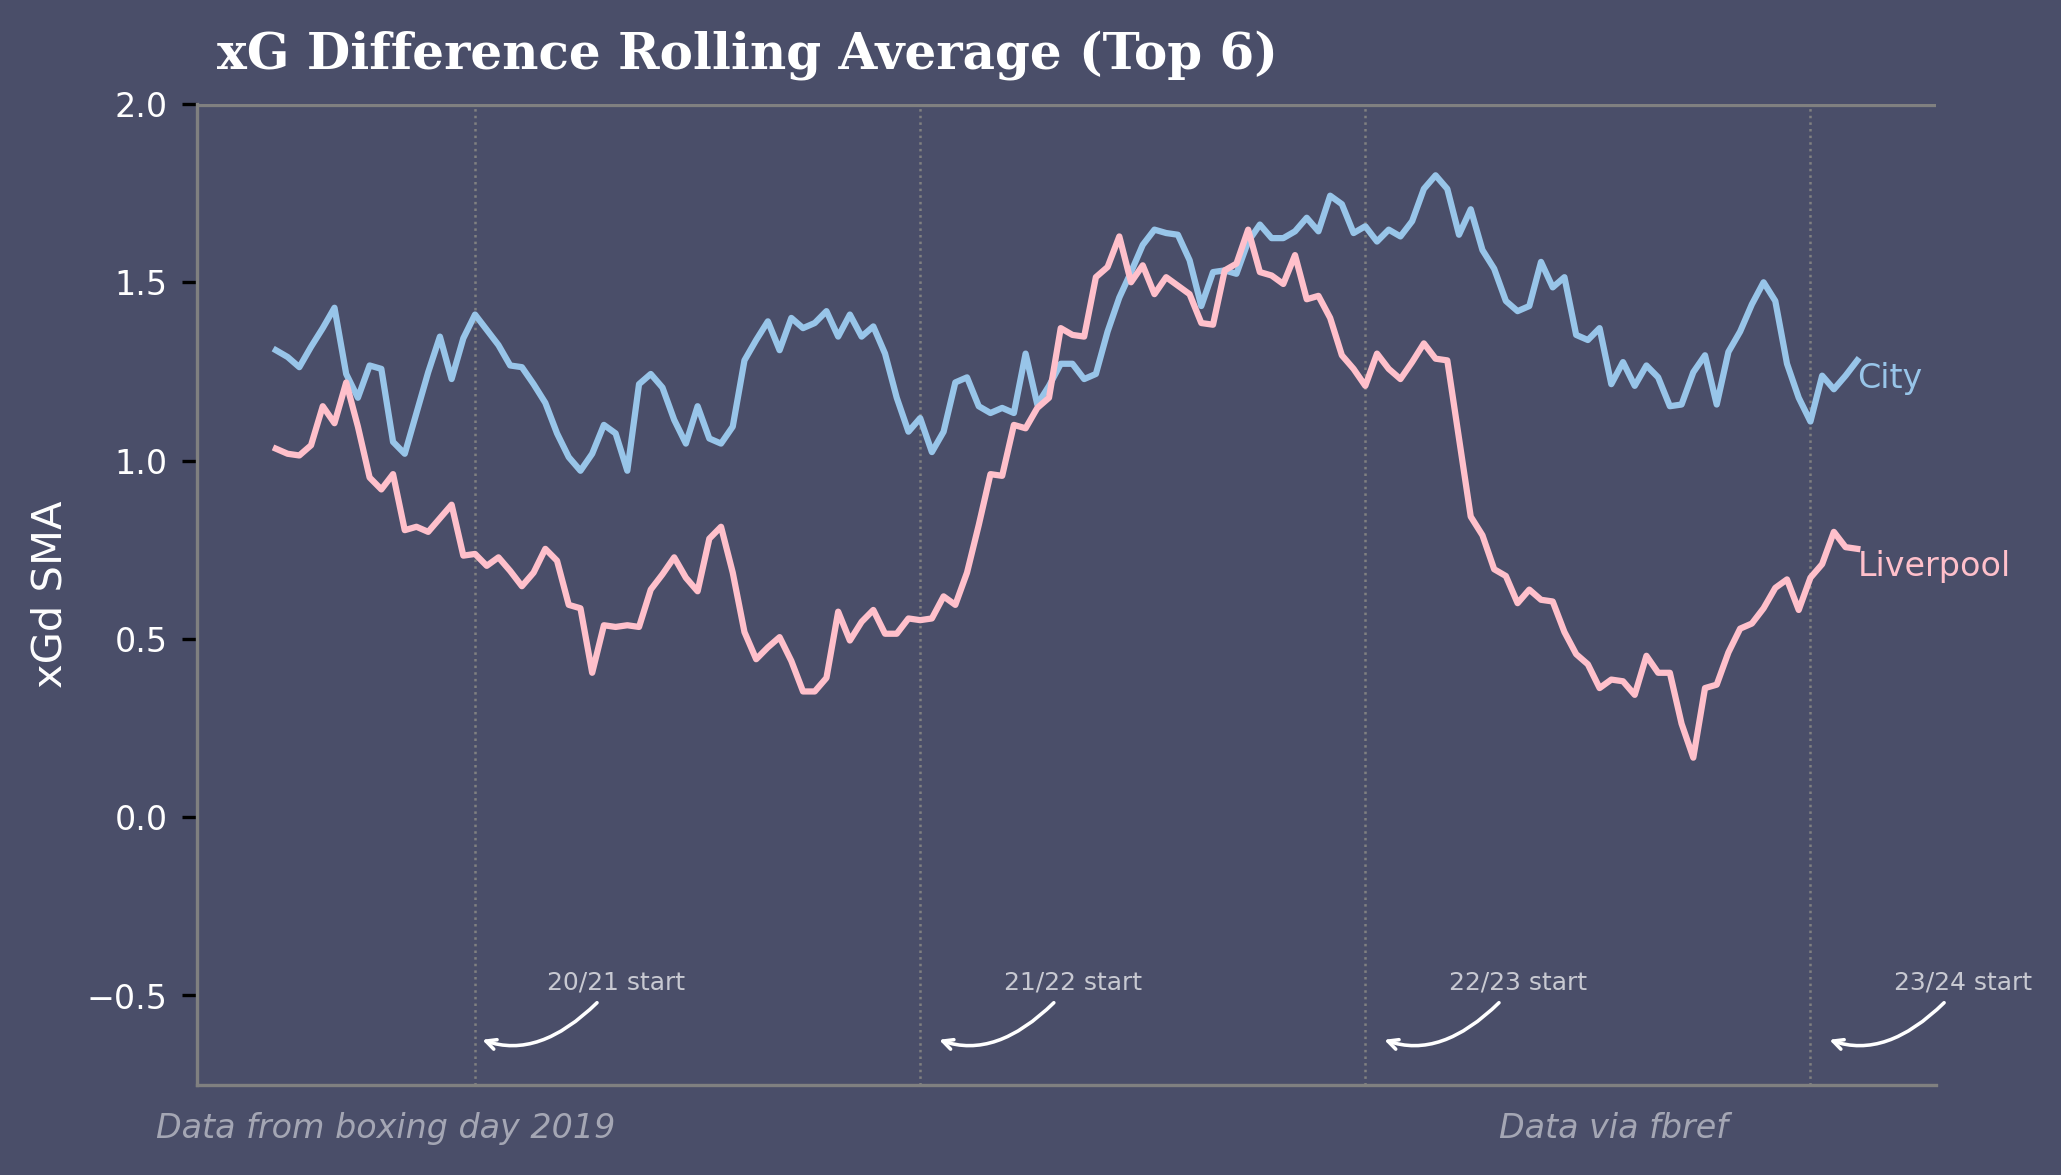

In [19]:
team_data_list = [city, liverpool]  # Add more teams as needed
team_names = ["City","Liverpool"]  # Match team names to team_data_list
plot_team_comparison(team_data_list, "xG Difference City vs Liverpool", team_names)

In [13]:
arsenal.reset_index()

,index,Date,xG,xGA,xGd,SMA,matches
0,20,2020-01-01,1.5,0.7,0.8,-0.128571,1
1,21,2020-01-11,1.4,0.6,0.8,-0.123810,2
2,22,2020-01-18,1.4,0.8,0.6,-0.061905,3
3,23,2020-01-21,0.4,2.9,-2.5,-0.109524,4
4,24,2020-02-02,1.2,1.9,-0.7,-0.161905,5
5,25,2020-02-16,2.6,0.9,1.7,0.009524,6
6,26,2020-02-23,1.3,2.7,-1.4,-0.100000,7
7,27,2020-03-07,1.2,1.5,-0.3,-0.161905,8
8,28,2020-06-17,0.3,2.6,-2.3,-0.300000,9
9,29,2020-06-20,0.8,1.0,-0.2,-0.314286,10
